# Proyecto final

Andrea Monzon 23006810 <br>
Juan Pablo Rodas 23007521

Dataset empleado para el proyecto: [Wine Rating & Price](https://www.kaggle.com/datasets/budnyak/wine-rating-and-price?select=Sparkling.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import boto3
import configparser
import psycopg2

In [4]:
config = configparser.ConfigParser()
config.read('../escec.cfg')

['../escec.cfg']

## Carga de datos

### Carga de datos desde RDS

In [27]:
aws_conn = boto3.client('rds', aws_access_key_id=config.get('IAM', 'ACCESS_KEY'),
                    aws_secret_access_key=config.get('IAM', 'SECRET_ACCESS_KEY'),
                    region_name='us-east-1')
                    
try:
     instances = aws_conn.describe_db_instances(DBInstanceIdentifier='proyectofinal')
     RDS_HOST = instances.get('DBInstances')[0].get('Endpoint').get('Address')
     print(RDS_HOST)
except Exception as ex:
     print("La instancia de base de datos no existe o aun no se ha terminado de crear.")
     print(ex)

proyectofinal.cvmhjcquzuf7.us-east-1.rds.amazonaws.com


In [28]:
postgres_driver = f"""postgresql://{config.get('RDS', 'DB_USER')}:{config.get('RDS', 'DB_PASSWORD')}@{RDS_HOST}:{config.get('RDS', 'DB_PORT')}/{config.get('RDS', 'DB_NAME')}"""

sql_query = 'SELECT * FROM rose_wine;'
rose_data = pd.read_sql(sql_query, postgres_driver)
rose_data.head()

,name,country,region,winery,rating,numberofratings,price,year
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018


### Carga de datos de S3

In [29]:
s3client = boto3.client(
    's3',
    aws_access_key_id=config.get('IAM', 'ACCESS_KEY'),
    aws_secret_access_key=config.get('IAM', 'SECRET_ACCESS_KEY'),
)

In [30]:
response = s3client.get_object(
    Bucket='proyectofinal-us-east-1-665777243823',
    Key='sources/Red.csv'
)

In [31]:
red_data = pd.read_csv(response.get("Body"))
red_data = red_data.rename(columns={"Name": "name", "Country": "country", "Region": "region", "Winery": "winery", "Rating": "rating", "NumberOfRatings": "numberofratings", "Price": "price", "Year": "year"}, errors="raise")

In [32]:
red_data.head()

,name,country,region,winery,rating,numberofratings,price,year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [33]:
response = s3client.get_object(
    Bucket='proyectofinal-us-east-1-665777243823',
    Key='sources/White.csv'
)

In [34]:
white_data = pd.read_csv(response.get("Body"))
white_data = white_data.rename(columns={"Name": "name", "Country": "country", "Region": "region", "Winery": "winery", "Rating": "rating", "NumberOfRatings": "numberofratings", "Price": "price", "Year": "year"}, errors="raise")

In [35]:
white_data.head()

,name,country,region,winery,rating,numberofratings,price,year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [36]:
red_data.describe()

,rating,numberofratings,price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


In [37]:
rose_data.describe()

,rating,numberofratings,price
count,397.000000,397.000000,397.000000
mean,3.741310,261.727960,12.525743
std,0.273042,1568.108597,16.037644
min,2.700000,25.000000,3.670000
25%,3.600000,40.000000,7.190000
50%,3.700000,72.000000,8.900000
75%,3.900000,167.000000,12.850000
max,4.800000,29531.000000,249.000000


In [38]:
white_data.describe()

,rating,numberofratings,price
count,3764.000000,3764.000000,3764.000000
mean,3.817906,187.567216,20.620319
std,0.266827,1071.470441,30.928415
min,2.200000,25.000000,3.740000
25%,3.600000,43.000000,9.260000
50%,3.800000,77.000000,13.150000
75%,4.000000,174.250000,20.865000
max,4.900000,62980.000000,681.370000


## Limpieza y procesamiento

In [39]:
red_data['type'] = 'Red'
rose_data['type'] = 'Rose'
white_data['type'] = 'White'

In [40]:
complete_df = pd.concat([red_data,rose_data,white_data], ignore_index = True)

In [41]:
complete_df.loc[ complete_df['year'] == 'N.V.']

,name,country,region,winery,rating,numberofratings,price,year,type
197,Délicate N.V.,South Africa,Stellenbosch,De Toren,4.1,1056,14.38,N.V.,Red
282,Overture N.V.,United States,Napa Valley,Opus One,4.4,10799,154.99,N.V.,Red
943,Red Blend N.V.,Chile,Lontue Valley,Caballo Loco,4.4,13136,34.07,N.V.,Red
2201,Cinquanta Collezione N.V.,Italy,Vino d'Italia,San Marzano,4.3,19454,16.38,N.V.,Red
2404,Limited Edition 10 Vendemmie N.V.,Italy,Montepulciano d'Abruzzo,Tenuta Ulisse,4.6,2080,30.90,N.V.,Red
4527,Lambrusco Reggiano Dolce N.V.,Italy,Reggiano,Riunite,3.7,359,5.89,N.V.,Red
4833,Little James' Basket Press Rouge N.V.,France,Vin de France,Château de Saint Cosme,3.6,3818,7.90,N.V.,Red
5632,Tre Autoctoni Evoluzione Notturnia N.V.,Italy,Vino d'Italia,Farnese,3.7,461,7.75,N.V.,Red
9045,Lambrusco Emilia Rosé N.V.,Italy,Emilia,Riunite,4.0,669,3.67,N.V.,Rose
9061,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,N.V.,Rose


In [42]:
complete_df.loc[ complete_df['year'] == 'N.V.'].count()

name               16
country            16
region             16
winery             16
rating             16
numberofratings    16
price              16
year               16
type               16
dtype: int64

In [43]:
complete_df.loc[ complete_df['year'] == 'N.V.', 'year'] = 0

In [44]:
complete_df['year'] = complete_df['year'].astype(int)

In [45]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12827 entries, 0 to 12826
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12827 non-null  object 
 1   country          12827 non-null  object 
 2   region           12827 non-null  object 
 3   winery           12827 non-null  object 
 4   rating           12827 non-null  float64
 5   numberofratings  12827 non-null  int64  
 6   price            12827 non-null  float64
 7   year             12827 non-null  int32  
 8   type             12827 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 851.9+ KB


In [46]:
complete_df.isna().sum()

name               0
country            0
region             0
winery             0
rating             0
numberofratings    0
price              0
year               0
type               0
dtype: int64

In [47]:
complete_df.head()

,name,country,region,winery,rating,numberofratings,price,year,type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


## Quitar caracteres especiales

In [48]:
complete_df['name'] = complete_df['name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
complete_df['winery'] = complete_df['winery'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [49]:
complete_df.head()

,name,country,region,winery,rating,numberofratings,price,year,type
0,Pomerol 2011,France,Pomerol,Chateau La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Chateau Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


## Analisis

<AxesSubplot:xlabel='Count', ylabel='type'>

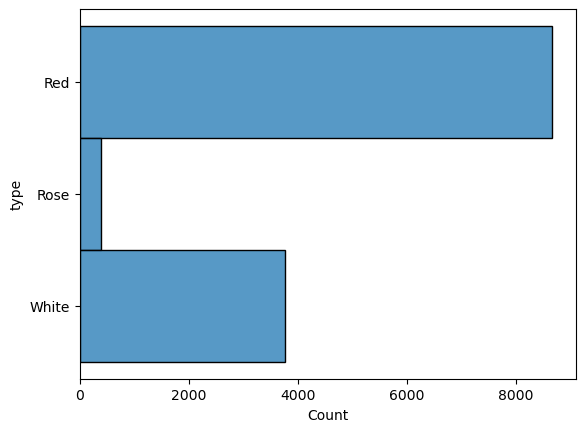

In [50]:
sns.histplot(y=complete_df["type"])

<AxesSubplot:xlabel='Count', ylabel='country'>

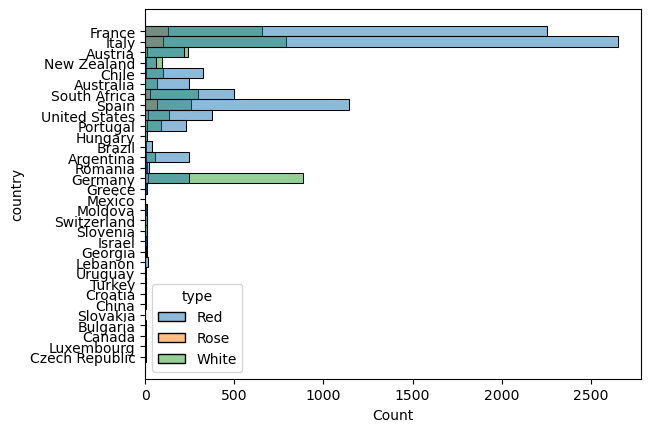

In [51]:
sns.histplot(data=complete_df, y="country", hue='type')

<AxesSubplot:xlabel='rating', ylabel='Count'>

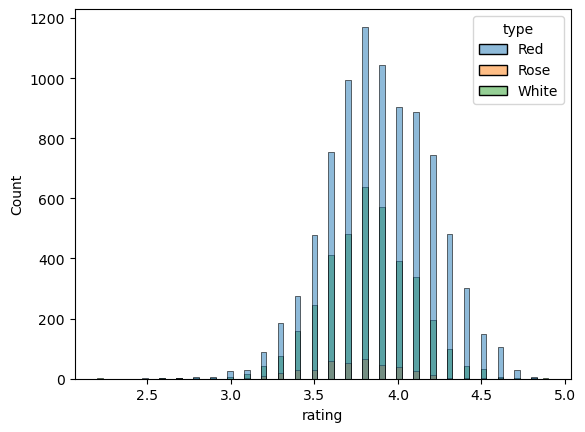

In [52]:
sns.histplot(data=complete_df, x='rating', hue='type')

<AxesSubplot:xlabel='Count', ylabel='year'>

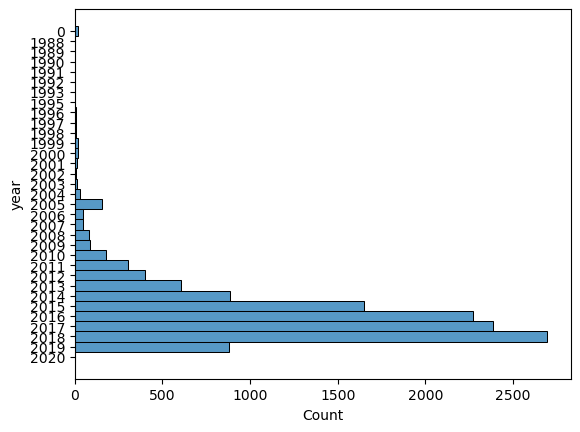

In [53]:
sns.histplot(y=complete_df['year'].sort_values().astype(str))
#test

Corr year: -0.3347815222698651


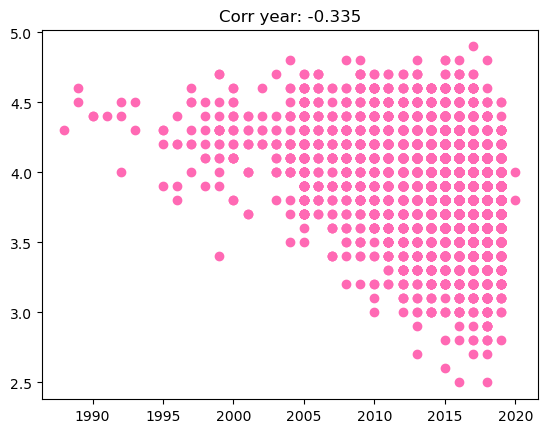

In [54]:
colName = 'year'
df_temp = complete_df.drop(complete_df[ complete_df['year'] == 0].index)

corr = df_temp[colName].corr(df_temp["rating"])
print(f"Corr {colName}: {corr}")
plt.scatter(df_temp[colName],df_temp["rating"], color = 'hotpink')
plt.title(f"Corr {colName}: {'%.3f' % corr}")
plt.show()

Corr price: 0.47235327795280146


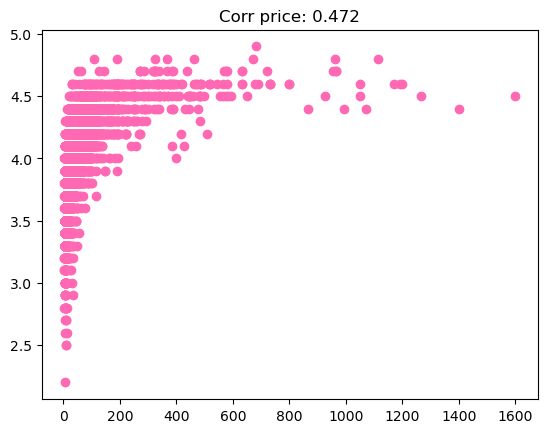

In [55]:
colName = 'price'
df_temp = complete_df.drop(complete_df[ complete_df['price'] > 2500].index)

corr = df_temp[colName].corr(df_temp["rating"])
print(f"Corr {colName}: {corr}")
plt.scatter(df_temp[colName],df_temp["rating"], color = 'hotpink')
plt.title(f"Corr {colName}: {'%.3f' % corr}")
plt.show()

In [56]:
complete_df.loc[complete_df['rating'] > 4.5][['country','rating']].groupby('country').count().sort_values('rating', ascending=False)

,rating
country,
Italy,49
France,46
Spain,16
United States,15
Argentina,6
Germany,4
Portugal,4
South Africa,4
Australia,3


In [57]:
complete_df.loc[complete_df['rating'] < 3][['country','rating']].groupby('country').count().sort_values('rating', ascending=False)

,rating
country,
Italy,6
France,4
South Africa,3
Austria,2
Brazil,2
Greece,2
Argentina,1
Chile,1
China,1


In [58]:
complete_df[['country','rating']].groupby('country').mean().sort_values('rating', ascending=False)

,rating
country,
Moldova,4.150000
Lebanon,4.137500
Croatia,4.083333
Czech Republic,4.050000
Georgia,3.976923
France,3.920671
Italy,3.890801
United States,3.888145
Germany,3.870200


In [59]:
complete_df[['year','rating']].groupby('year').mean().sort_values('rating', ascending=False)

,rating
year,
1989,4.550000
1990,4.400000
1991,4.400000
1993,4.400000
1997,4.328571
2002,4.314286
1988,4.300000
1992,4.300000
2000,4.252632


In [10]:
import sys
sys.path.insert(0, '../scripts')
import extract, process, load

In [3]:
rose_df = extract.extractRDS()

proyectofinal.cvmhjcquzuf7.us-east-1.rds.amazonaws.com


In [4]:
rose_df.head()

,name,country,region,winery,rating,numberofratings,price,year
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018


In [5]:
red_df, white_df= extract.extractS3()

In [6]:
red_df.head()

,name,country,region,winery,rating,numberofratings,price,year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [7]:
white_df.head()

,name,country,region,winery,rating,numberofratings,price,year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [8]:
complete_df = process.data_processing(red_df, rose_df, white_df)

In [9]:
complete_df.head()

,name,country,region,winery,rating,numberofratings,price,year,type
0,Pomerol 2011,France,Pomerol,Chateau La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Chateau Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


In [12]:
load.load_to_dl(complete_df, "proyectofinal-us-east-1-665777243823", 'results/wine_complete_df.csv')